In [1]:
from overcooked_ai_py.utils import load_pickle, mean_and_std_err
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from human_ai_robustness.qualitative_robustness_expt import filter_tests_by_attribute

In [9]:
# def filter_tests_by_attribute(tests_dict, attribute, value):
#     """
#     Returns tests that have `attribute` == `value`
#     """
#     filtered_tests = {}
#     for test_name, test_data_dict in tests_dict.items():
#         if test_data_dict[attribute] == value:
#             filtered_tests[test_name] = test_data_dict
#     return filtered_tests

def filter_all_tests_by_attribute(all_test_data, attribute, value):
    return { agent_name : filter_tests_by_attribute(test_dict, attribute, value) for agent_name, test_dict in results.items() }


def simple_layout_histogram(results_dicts, layout, barWidth=0.2):
    
    success_means_by_agent = defaultdict(list)
    success_ses_by_agent = defaultdict(list)

    for agent_type, result_dict in results_dicts.items():
        for test_name, test_data in result_dict.items():
            if test_data["layout"] == layout:
                success_mean, success_se = test_data["success_rate_mean_and_se"]
                success_means_by_agent[agent_type].append(success_mean)
                success_ses_by_agent[agent_type].append(success_se)
    
    x_axis = [k for k, v in list(results_dicts.values())[0].items() if v['layout'] == layout]
    xs = list(range(len(x_axis)))
    

    print(success_means_by_agent)
    
    colors = {
        'agent_0': "red", 
        'agent_1': "lime"
    }
    
    plt.figure(figsize=(20,10))
    for k in results_dicts.keys():
        xs = np.array(xs) + barWidth
        ys = success_means_by_agent[k]
        yerrs = success_ses_by_agent[k]
        plt.bar(xs, ys, yerr=yerrs, width=barWidth, label=k, color=colors[k])
    plt.title("qualitative experiments across models for layout {}".format(layout))
    plt.ylabel("success rate")
    plt.xticks([r + barWidth for r in range(len(xs))], x_axis)
    plt.grid()
    plt.legend()
    
def multi_layout_histogram(results_dicts, layouts, barWidth=0.2):
    # TODO

In [10]:
# You load results for each agent that you've evaluated independently, and just have to specify the agent's name

results_a = load_pickle("sample_data")
results_b = load_pickle("sample_data")

results = {
    "agent_0": results_a,
    "agent_1": results_b
}

defaultdict(<class 'list'>, {'agent_0': [0.0, 0.0, 0.0, 0.3125, 0.0, 0.75, 0.6666666666666666], 'agent_1': [0.0, 0.0, 0.0, 0.3125, 0.0, 0.75, 0.6666666666666666]})


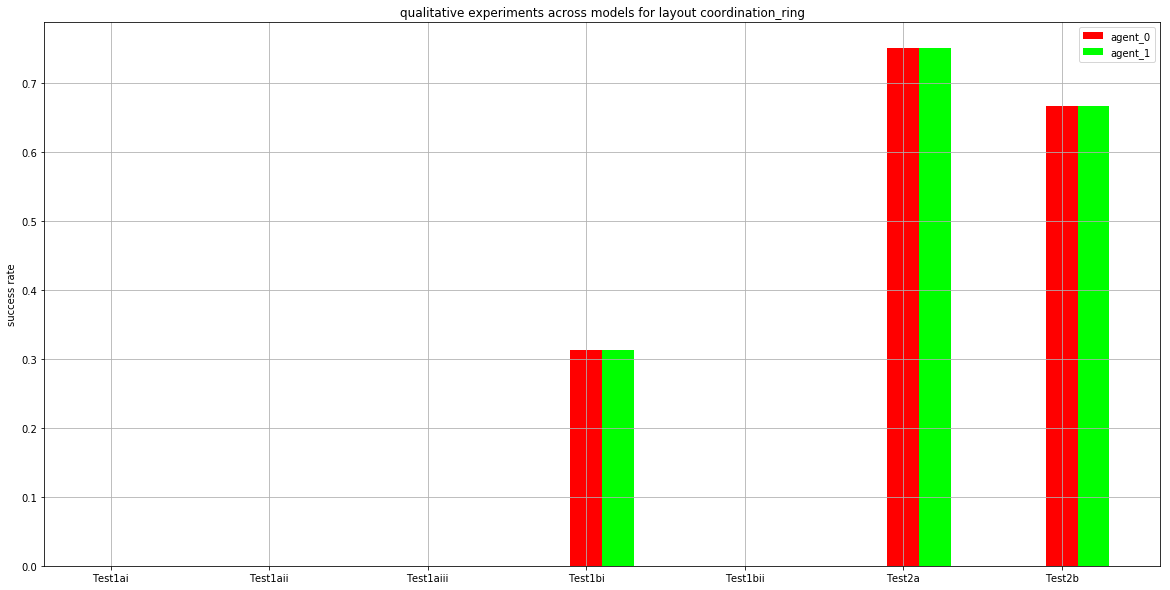

In [11]:
# Then you can plot a graph for each layout separately which compares the agents
simple_layout_histogram(results, "coordination_ring")

defaultdict(<class 'list'>, {'agent_0': [0.0, 0.0, 0.3125, 0.0, 0.75, 0.6666666666666666], 'agent_1': [0.0, 0.0, 0.3125, 0.0, 0.75, 0.6666666666666666]})


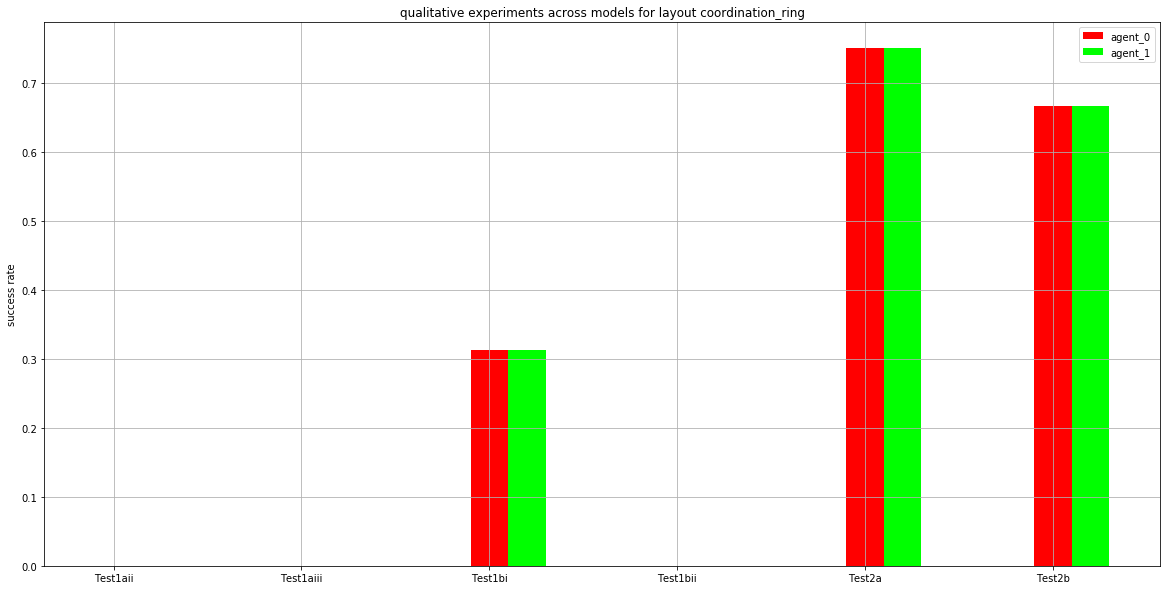

In [13]:
results_filtered = filter_all_tests_by_attribute(results, "test_types", ["state_robustness"])
simple_layout_histogram(results_filtered, "coordination_ring")